In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('twitter_training.csv'  , header=None , index_col =False , names=['Tweet_Id','Topic','Sentiment','Tweet'], dtype=str)


In [3]:
df.sample(5)

,Tweet_Id,Topic,Sentiment,Tweet
68370,3708,Cyberpunk2077,Irrelevant,Wow @OzzieDrongo...
6843,377,Amazon,Negative,I thought going after workers for safety whist...
51455,10432,RedDeadRedemption(RDR),Neutral,NaN
61204,4891,GrandTheftAuto(GTA),Irrelevant,2008 . Toronto is the arts and culture capita...
11556,13186,Xbox(Xseries),Positive,.


In [4]:
df.columns

Index(['Tweet_Id', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_Id   74682 non-null  object
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [6]:
# dtypes are not proper converting all the dtypes

df['Tweet_Id'] = df['Tweet_Id'].astype(int)

In [7]:
df['Topic'] = df['Topic'].astype('category')

In [8]:
df['Sentiment'] = df['Sentiment'].astype('category')

In [9]:
df['Tweet'] = df['Tweet'].astype('string')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Tweet_Id   74682 non-null  int64   
 1   Topic      74682 non-null  category
 2   Sentiment  74682 non-null  category
 3   Tweet      73996 non-null  string  
dtypes: category(2), int64(1), string(1)
memory usage: 1.3 MB


In [11]:
# checking for null values
df.isnull().sum()

,0
Tweet_Id,0
Topic,0
Sentiment,0
Tweet,686


In [12]:
# summing up the total duplicate rows
df.duplicated().sum()

np.int64(2700)

In [13]:
# droped duplicaterows

df_cleaned = df.drop_duplicates()

In [14]:
sentiment_count = df['Sentiment'].value_counts()


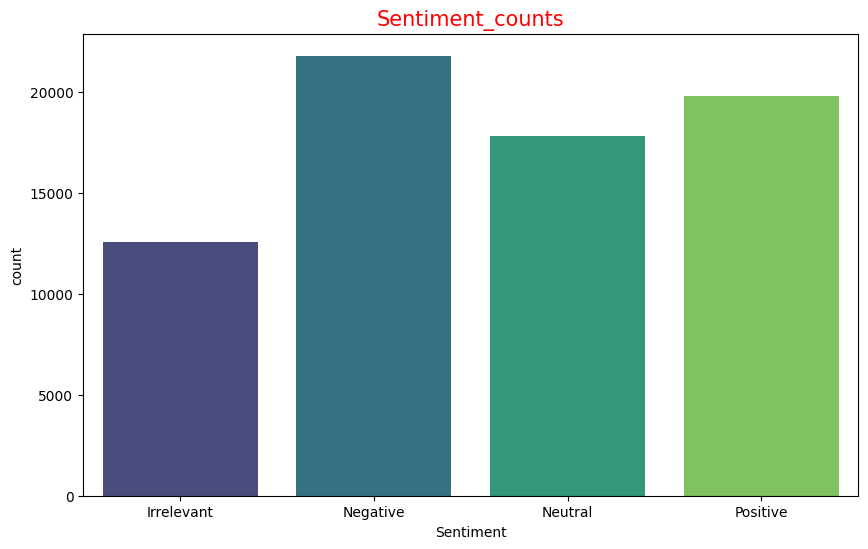

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = df_cleaned['Sentiment'] ,data=df_cleaned ,palette='viridis')

plt.title("Sentiment_counts",fontsize=15 , color= 'red')
plt.show()

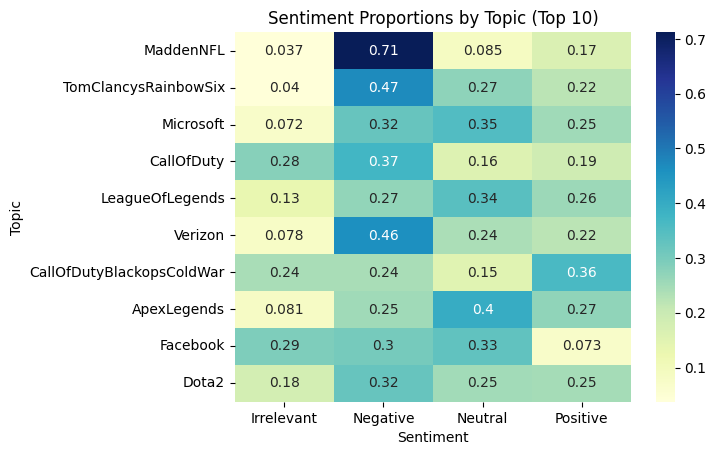

In [16]:
# Grouping  'Topic' and 'Sentiment' to get the count of each combination
topic_sentiment = df.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

# Normalizing the values to get proportions
topic_sentiment_normalized = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0)

# Ploting the heatmap for the top 10 topics
top_topics = df['Topic'].value_counts().nlargest(10).index
sns.heatmap(topic_sentiment_normalized.loc[top_topics], annot=True, cmap='YlGnBu')
plt.title('Sentiment Proportions by Topic (Top 10)')
plt.ylabel('Topic')
plt.xlabel('Sentiment')
plt.show()


# **Conclusions**

-> Topic “Borderlands” exhibits a 60% negative sentiment, indicating significant user dissatisfaction.

-> Topic “Cyberpunk” shows a 75% neutral sentiment, suggesting a lack of strong opinions among users.

-> Irrelevant tweets constitute approximately 20% of the dataset, which may introduce noise and affect the clarity of sentiment analysis.